In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [47]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=["date"], index_col="date")

In [6]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [7]:
df.shape

(1304, 2)

# Clean data

In [8]:
df = df.drop(df[(df['value'] < df['value'].quantile(0.025)) | (df['value'] > df['value'].quantile(0.0975))].index)

In [13]:
df

,date,value
39,2016-06-17,21691
40,2016-06-18,21681
43,2016-06-21,26805
47,2016-06-25,21923
48,2016-06-26,22685
...,...,...
369,2017-05-13,26105
377,2017-05-21,25970
383,2017-05-27,26679
384,2017-05-28,26758


 # Draw line plot

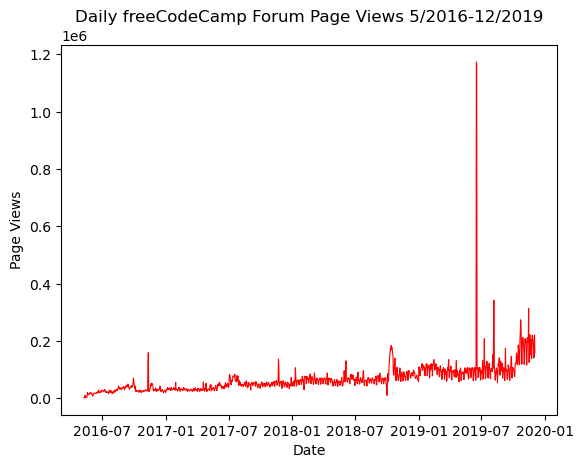

In [69]:

y = df['value']

fig = plt.plot(y, color='red', linewidth=0.8)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

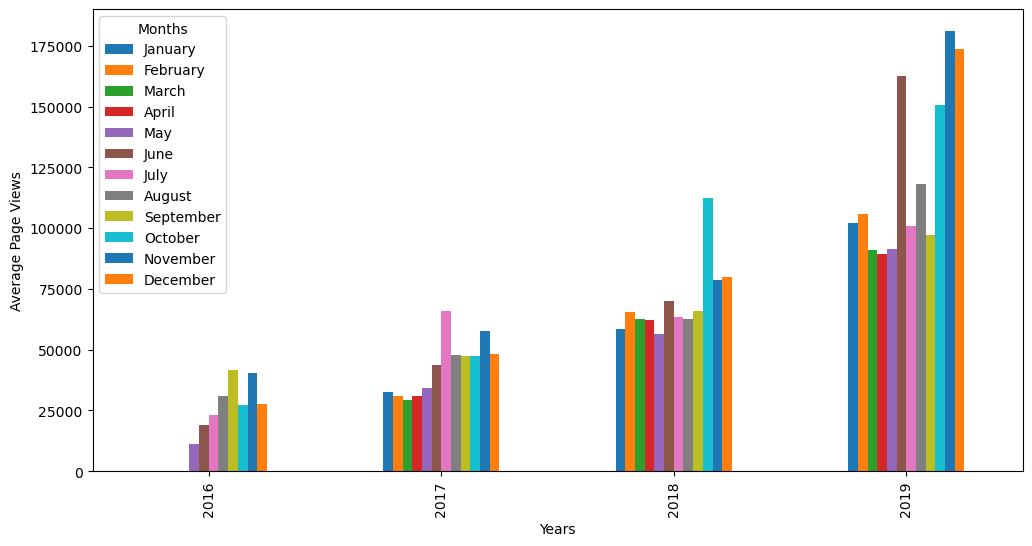

In [71]:
df_bar = df.groupby([df.index.year, df.index.month_name()])
df_bar = df_bar.mean().value.unstack()
# Sort columns by month names
df_bar = df_bar[list(calendar.month_name)[1:]]
df_bar.columns.name = "Months"
fig = df_bar.plot(kind="bar", figsize=(12, 6), xlabel="Years", ylabel="Average Page Views").get_figure()
fig.savefig('bar_plot.png')

<Axes: xlabel='month', ylabel='year'>

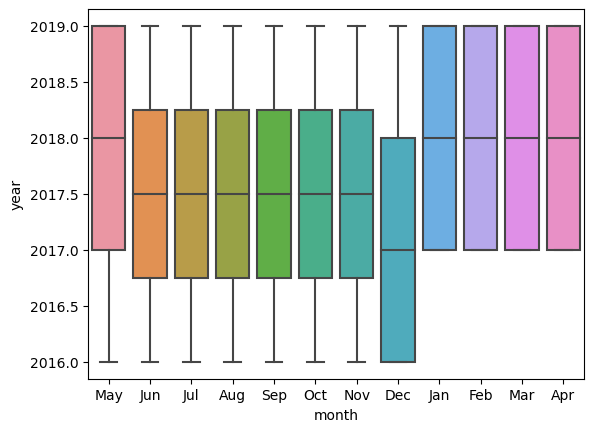

In [53]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
sns.boxplot(x=df_box['month'], y=df_box['year'], data=df_box)

Text(0, 0.5, 'Page Views')

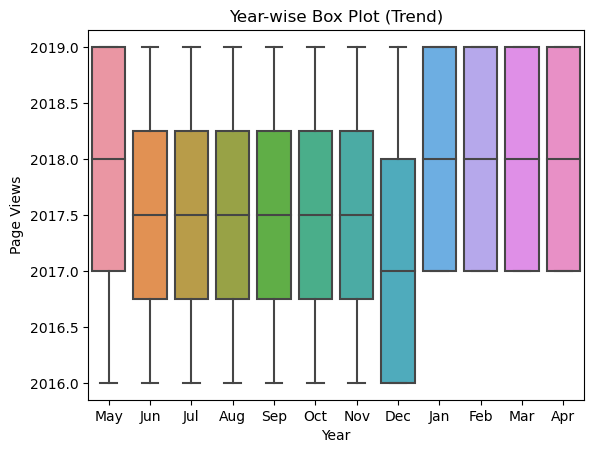

In [57]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
plt1 =sns.boxplot(x = df_box['month'], y = df_box['year'], data = df_box)
plt1.set_title("Year-wise Box Plot (Trend)")
plt1.set_xlabel('Year')
plt1.set_ylabel('Page Views')